# HDBSCAN for clustering artists by aggregated audio features

In [2]:
from recordings_clusters import RecordingsClusters
clust = RecordingsClusters(True)
clust.run()

selecting recordings ...
collecting track features ...
8267 feature vectors of 8267 tracks by 382 artists
collecting tag data ..
loaded tags for 399 artists
finished collecting tags ..
processing time: 13.124 seconds
making clusters ..
finished making clusters ..
processing time: 8.546 seconds
assigning clusters ..
clusters assigned ..
processing time: 0.033 seconds
collecting artists ..
processing time: 1.062 seconds
total processing time 22.767 seconds


In [3]:
clust.print_cluster_stats()

num 29 | max 173 | min 35 | mean 100 | median 102
8267 tracks by 382 artists


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 8267 samples in 0.017s...
[t-SNE] Computed neighbors for 8267 samples in 4.341s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8267
[t-SNE] Computed conditional probabilities for sample 2000 / 8267
[t-SNE] Computed conditional probabilities for sample 3000 / 8267
[t-SNE] Computed conditional probabilities for sample 4000 / 8267
[t-SNE] Computed conditional probabilities for sample 5000 / 8267
[t-SNE] Computed conditional probabilities for sample 6000 / 8267
[t-SNE] Computed conditional probabilities for sample 7000 / 8267
[t-SNE] Computed conditional probabilities for sample 8000 / 8267
[t-SNE] Computed conditional probabilities for sample 8267 / 8267
[t-SNE] Mean sigma: 12.200978
[t-SNE] KL divergence after 250 iterations with early exaggeration: 97.900917
[t-SNE] KL divergence after 2000 iterations: 2.346105


<IPython.core.display.Javascript object>


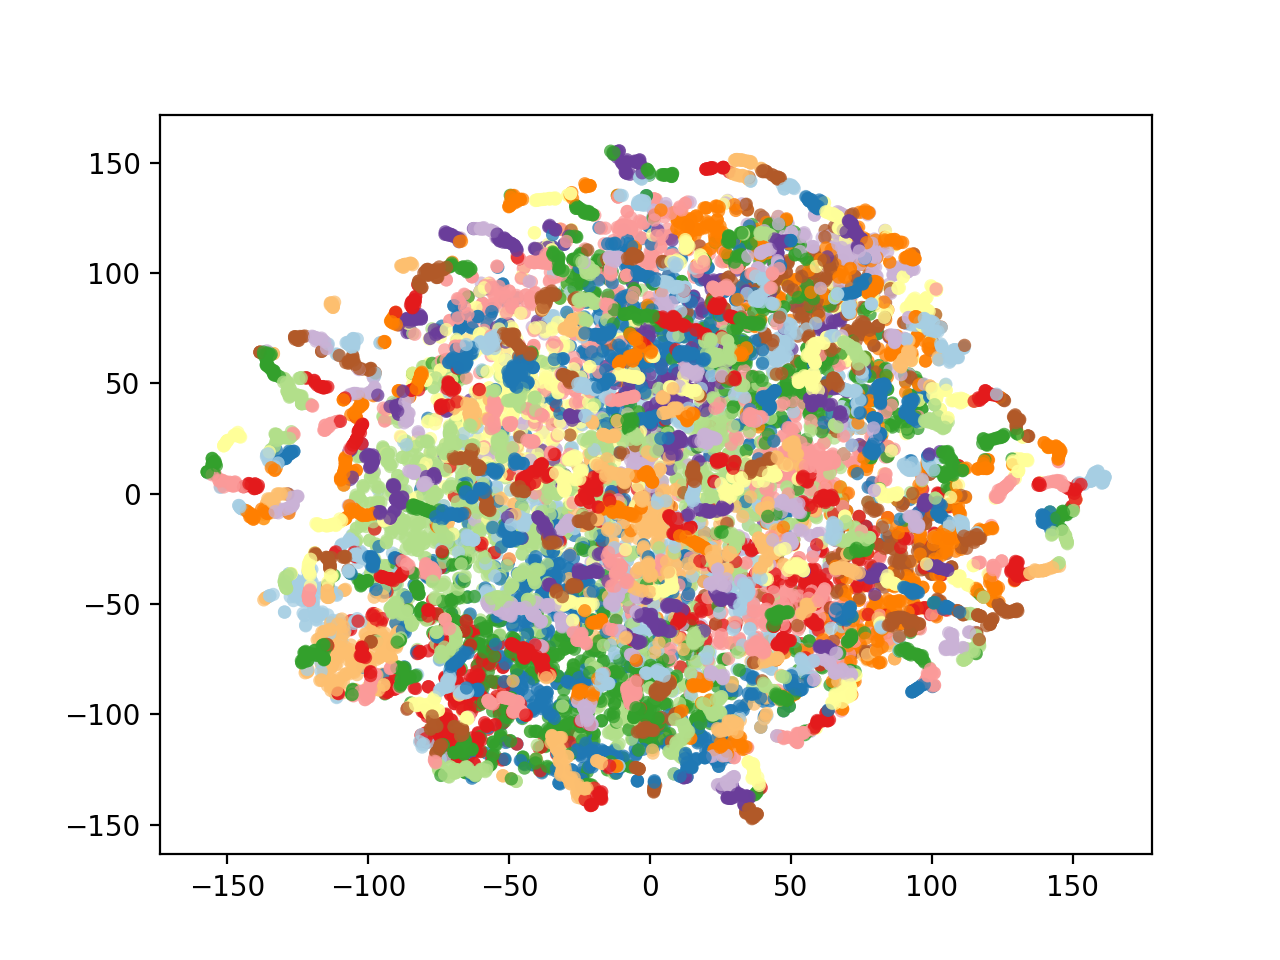

In [4]:
%matplotlib notebook
from plotter import Plotter
p = Plotter(clust)
p.plot_clusters()

In [14]:
from bipartite_clusters import BipartiteClusters
bi = BipartiteClusters()
bi.set_clusters(clust)
bi.calculate_artist_similarity('max-degree', max_similarities=5, include_self=False)


  4% (17 of 382) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:02

calculating max-degree similarity


100% (382 of 382) |######################| Elapsed Time: 0:00:01 Time:  0:00:01




total processing time: 1.606 seconds


In [15]:
test = [
    'da5e774b-026a-4117-82a4-11d246c05a8b', # Ligeti
    'c5e51d1d-979a-485d-9dbe-ee02273a35af', # Optical
    'b6b2bb8d-54a9-491f-9607-7b546023b433', # Pixies
    'bf2e15d0-4b77-469e-bfb4-f8414415baca', # Public Enemy
    '05755bf1-380c-487f-983f-d1a02401fa28'  # Cat Power
] 

for _id in test:
    print('\n--', clust.names[_id])
    [ print(clust.names[_a['id']], _a['similarity']) 
         for _a in bi.artist_similarities[_id] ]


-- György Ligeti
Pierre Schaeffer 0.04550249706633014
Michel Chion 0.04109350327742897
Wadada Leo Smith 0.035446490152334094
Pierre Boulez 0.03525893189630398
Dick Raaijmakers 0.03523866627817241

-- Optical
Doc Scott 0.046359711542274376
Jonny L 0.03669582929478281
Digital Mystikz 0.0327093250917076
Peshay 0.03117155323179148
Calyx 0.02882706941211401

-- Pixies
The Smiths 0.08293568659752547
Curve 0.08187967429063757
Ministry 0.07601321116323857
Minor Threat 0.07291999471166068
Motörhead 0.07028784055878465

-- Public Enemy
Throwing Muses 0.05864033624839169
Ladytron 0.04758978553518688
Soundgarden 0.044320996342692584
Patti Smith Group 0.04364691081798036
Yeah Yeah Yeahs 0.039284682473824634

-- Cat Power
Pauline Oliveros 0.0602829001914305
Thelonious Monk 0.05590443457440603
The Mount Fuji Doomjazz Corporation 0.0484898646474003
Aphex Twin 0.0483006686816576
Rokia Traoré 0.048042674726429556


In [16]:
bi.calculate_artist_similarity('heat-prob', max_similarities=5, include_self=False)

  4% (18 of 382) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:02

calculating heat-prob similarity


100% (382 of 382) |######################| Elapsed Time: 0:00:01 Time:  0:00:01




total processing time: 1.528 seconds


In [17]:
for _id in test:
    print('\n--', clust.names[_id])
    [ print(clust.names[_a['id']], _a['similarity']) 
         for _a in bi.artist_similarities[_id] ]


-- György Ligeti
Kryptic Minds 0.09158893785087792
Goem 0.07385273523603038
Noto 0.06944278468341367
Loscil 0.06402335585519978
Dick Raaijmakers 0.05573765932442175

-- Optical
Marcus Intalex 0.007494475836428814
Peshay 0.007316326989885361
Doc Scott 0.007074299096657216
Jonny L 0.006783755730904363
Terror Danjah 0.006680393639243629

-- Pixies
Whitehouse 0.024284477292146316
7 Year Bitch 0.01968786777758283
TOKiMONSTA 0.015174374847102186
Staff Benda Bilili 0.015134995484655325
Terror Danjah 0.014611861942902649

-- Public Enemy
Peshay 0.03464733103031945
Kode9 0.031344184011657214
Doc Scott 0.02948676334347786
Terror Danjah 0.029074198188376272
Kim Cascone 0.027841141467917302

-- Cat Power
Loscil 0.04356673444503584
Whitehouse 0.04113845430036003
Byetone 0.03322560184407251
Biosphere 0.03012500611656961
Kim Cascone 0.02921201060260442


In [18]:
clust.run('rhythm')

selecting recordings ...
collecting track features ...
8267 feature vectors of 8267 tracks by 382 artists
collecting tag data ..
loaded tags for 399 artists
finished collecting tags ..
processing time: 8.381 seconds
making clusters ..
finished making clusters ..
processing time: 55.165 seconds
assigning clusters ..
clusters assigned ..
processing time: 0.023 seconds
collecting artists ..
processing time: 0.874 seconds
total processing time 64.444 seconds


In [19]:
clust.print_cluster_stats()

num 293 | max 38 | min 10 | mean 21 | median 21
8267 tracks by 382 artists


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 8267 samples in 0.006s...
[t-SNE] Computed neighbors for 8267 samples in 0.058s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8267
[t-SNE] Computed conditional probabilities for sample 2000 / 8267
[t-SNE] Computed conditional probabilities for sample 3000 / 8267
[t-SNE] Computed conditional probabilities for sample 4000 / 8267
[t-SNE] Computed conditional probabilities for sample 5000 / 8267
[t-SNE] Computed conditional probabilities for sample 6000 / 8267
[t-SNE] Computed conditional probabilities for sample 7000 / 8267
[t-SNE] Computed conditional probabilities for sample 8000 / 8267
[t-SNE] Computed conditional probabilities for sample 8267 / 8267
[t-SNE] Mean sigma: 0.022895
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.095108
[t-SNE] KL divergence after 2000 iterations: 0.729027


<IPython.core.display.Javascript object>


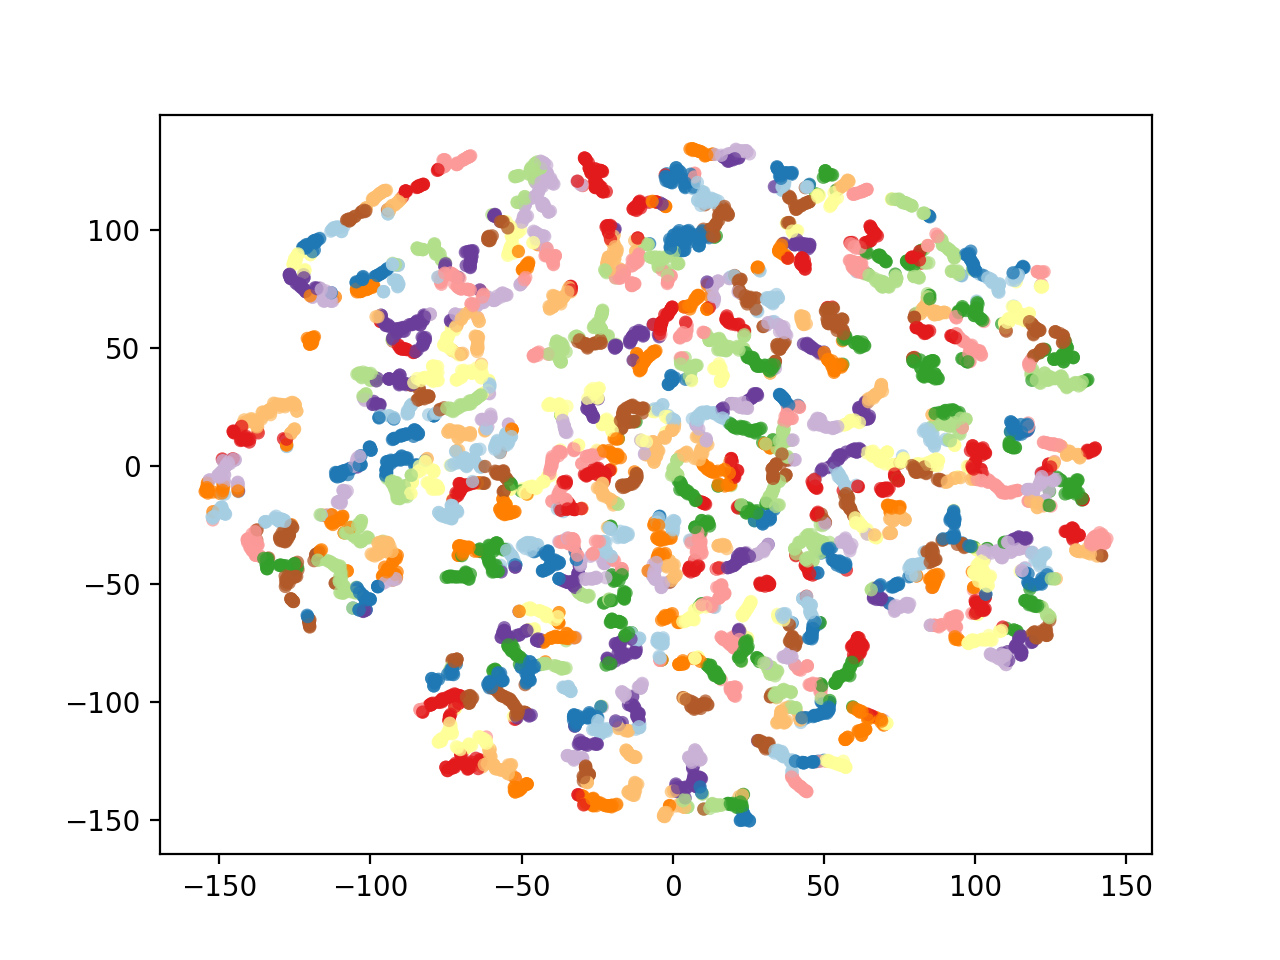

In [21]:
%matplotlib notebook
p = Plotter(clust)
p.plot_clusters()

In [22]:
bi = BipartiteClusters()
bi.set_clusters(clust)
bi.calculate_artist_similarity('max-degree', max_similarities=5, include_self=False)


  7% (29 of 382) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:01

calculating max-degree similarity


100% (382 of 382) |######################| Elapsed Time: 0:00:00 Time:  0:00:00




total processing time: 1.003 seconds


In [23]:
for _id in test:
    print('\n--', clust.names[_id])
    [ print(clust.names[_a['id']], _a['similarity']) 
         for _a in bi.artist_similarities[_id] ]


-- György Ligeti
Claudio Monteverdi 0.2448853533250637
Sigur Rós 0.23069519151241102
Merzbow 0.20822024279727683
Ufomammut 0.19612517612600644
Edgard Varèse 0.16979992907655686

-- Optical
Dillinja 0.10483587828087959
E-Z Rollers 0.09374867810270014
Roni Size 0.0903804900416116
Grooverider 0.07143973440797176
Calyx 0.05743283707345459

-- Pixies
Nick Cave & The Bad Seeds 0.22774261031374216
John Zorn 0.21800195264016684
Soundgarden 0.17245337090454846
Kate Bush 0.1647055007920451
Sielun Veljet 0.1374427096395874

-- Public Enemy
The Roots 0.39053371506542656
Ice Cube 0.21718013916158926
Arrested Development 0.12698338182114255
DJ Food 0.12290204461517833
Muslimgauze 0.11304925914122542

-- Cat Power
The White Stripes 0.20577379433128956
Fucked Up 0.16641478490411404
Boards of Canada 0.12729039306579432
Duke Ellington 0.12162222105714751
Veruca Salt 0.11121510269747722


In [24]:
bi.calculate_artist_similarity('heat-prob', max_similarities=5, include_self=False)

 17% (65 of 382) |###                    | Elapsed Time: 0:00:00 ETA:   0:00:00

calculating heat-prob similarity


100% (382 of 382) |######################| Elapsed Time: 0:00:01 Time:  0:00:01




total processing time: 1.101 seconds


In [25]:
for _id in test:
    print('\n--', clust.names[_id])
    [ print(clust.names[_a['id']], _a['similarity']) 
         for _a in bi.artist_similarities[_id] ]


-- György Ligeti
Merzbow 0.055893509280886294
Claudio Monteverdi 0.04282418719021086
Edgard Varèse 0.03845199277517594
Edvard Grieg 0.03777121680247104
Sigur Rós 0.03632424823042291

-- Optical
Terror Danjah 0.03254474927839685
Digital Mystikz 0.029421287804797802
Kode9 0.026811675366633352
MC Conrad 0.024016666715281753
Dum Dum Girls 0.021936736265340536

-- Pixies
Nick Cave & The Bad Seeds 0.023888081182702154
Pierre Schaeffer 0.021107667054845042
John Zorn 0.020725822125998408
Soundgarden 0.01989386221860296
Sielun Veljet 0.018961172935752335

-- Public Enemy
The Roots 0.05235894342264661
Ice Cube 0.03028525975941101
Muslimgauze 0.027890464774171946
Arrested Development 0.024888061689992424
Transglobal Underground 0.024738414021122798

-- Cat Power
Nirvana 0.019945838598531496
The White Stripes 0.019839043385384492
Fucked Up 0.018083609107676354
Pearl Jam 0.016950901578607545
Motörhead 0.01694118997021398
